In [1]:
import numpy as np
from scipy import signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import math
from IPython.display import Audio
from scipy.sparse import csr_matrix

In [2]:
sourceFilesPrefix="ExpectedResults//speech-"

rate1, sample1_data = scipy.io.wavfile.read(sourceFilesPrefix+"1.wav")
rate2, sample2_data=scipy.io.wavfile.read(sourceFilesPrefix+"2.wav")

In [3]:
def sigmoid(y):
    g=np.divide(1,np.add(1,np.exp(-y)))
    return g

def gradient(eta, Y, W):
    Z=sigmoid(Y)
    Id=np.identity(Y.shape[0])
    grad=eta*(Id+np.dot((1-2*Z),Y.T))*W
    # la cost se adauga 1/norma de W, 
    # se schimba gradientul pentru noua expresie
    return grad

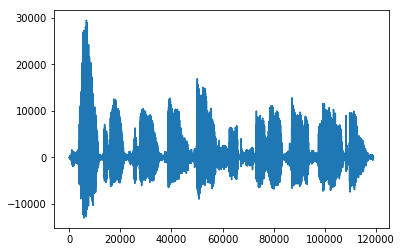

In [4]:
plt.figure()
plt.plot(sample1_data)
plt.show()
Audio(data=sample1_data, rate=16000)

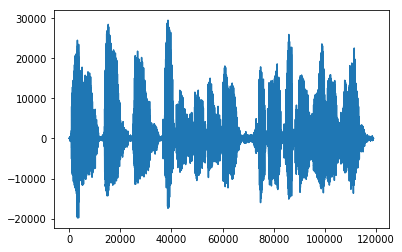

In [5]:
plt.figure()
plt.plot(sample2_data)
plt.show()
Audio(data=sample2_data, rate=16000)

In [6]:
med1=sample1_data.std(axis=0)
s1data= sample1_data/med1
med2=sample2_data.std(axis=0)
s2data=sample2_data/med2
orig=np.matrix([s1data,s2data])

n=len(orig)
#A=np.random.random([n,n])
A=np.matrix([[0.15270211,0.8406566],
             [0.90514896,0.53725471]])
print("Mixing matrix: \n"+str(A))

X=np.dot(A,orig)


Mixing matrix: 
[[ 0.15270211  0.8406566 ]
 [ 0.90514896  0.53725471]]


In [7]:
print("Correlation coefficient - original data \n" + str(np.corrcoef(s1data,s2data)))
print(np.correlate(np.ravel(s1data),np.ravel(s2data)))
print("Correlation coefficient - mixed data \n" + str(np.corrcoef(X)))
print(np.correlate(np.ravel(X[0]),np.ravel(X[1])))

Correlation coefficient - original data 
[[ 1.         -0.00423728]
 [-0.00423728  1.        ]]
[-504.12514754]
Correlation coefficient - mixed data 
[[ 1.          0.65361556]
 [ 0.65361556  1.        ]]
[ 69754.81131502]


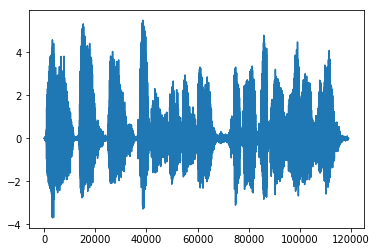

In [8]:
plt.figure()
plt.plot(X[0].T)
plt.show()

In [9]:
Audio(data=X[0], rate=16000)

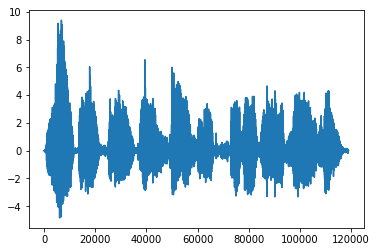

In [10]:
plt.figure()
plt.plot(X[1].T)
plt.show()

In [11]:
Audio(data=X[1], rate=16000)

In [12]:
corr=1
while abs(corr)>=9e-8:
    eta=0.01
    eta0=eta
    T=1000
    num_iter=10000

    W=np.random.random([n,n])/100
    print("Initial guessed decomposition matrix: \n"+str(W))
    for i in range(0,num_iter):
        Y=np.dot(W,X)
        delW=gradient(eta,Y,W)
        W+=delW
        
        eta=eta0/(1+(i/T))
    Y2=np.dot(W,X)
    corr=np.corrcoef(Y2)[1][0]
    print(corr)

Initial guessed decomposition matrix: 
[[ 0.0007906   0.00562855]
 [ 0.00947492  0.00893736]]
7.06361906962e-07
Initial guessed decomposition matrix: 
[[ 0.00803845  0.00618748]
 [ 0.00296165  0.00490564]]
1.0626828239e-07
Initial guessed decomposition matrix: 
[[ 0.0084882   0.00055082]
 [ 0.00231986  0.00733268]]
-1.01568936118e-06
Initial guessed decomposition matrix: 
[[ 0.00650257  0.00862316]
 [ 0.00202812  0.00494504]]
6.37351233061e-07
Initial guessed decomposition matrix: 
[[ 0.0039292   0.00913803]
 [ 0.00884691  0.001002  ]]
-1.15599781256e-06
Initial guessed decomposition matrix: 
[[ 0.00733259  0.00535971]
 [ 0.00588633  0.00290203]]
-1.30246175388e-06
Initial guessed decomposition matrix: 
[[ 0.00372394  0.00221671]
 [ 0.00552097  0.00265757]]
-6.14872328924e-07
Initial guessed decomposition matrix: 
[[ 0.00196615  0.00802484]
 [ 0.00445385  0.00797623]]
1.40290616263e-07
Initial guessed decomposition matrix: 
[[ 0.00049312  0.00349116]
 [ 0.00293874  0.00112525]]
-6.2978

In [13]:
def costFunc(Y,W):
    Z=sigmoid(Y)
    #print(np.dot(Z.T,Z).shape)
    #a=csr_matrix(Z.T)
    #b=csr_matrix(1-Z)
    #c2=np.linalg.det(W)
    #C2=np.log(c2)
    
    c1=np.dot((1-Z).T,Z)
    C1=np.log(c1)
    return np.sum(C1)

[[ 0.00510751 -0.0003973 ]
 [-0.003765    0.00514103]]


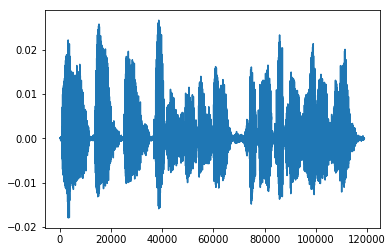

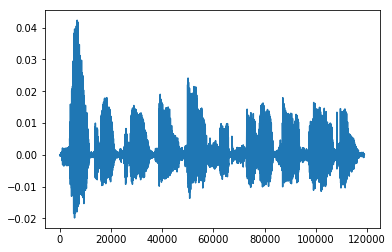

In [14]:
print(W)
Y2=np.dot(W,X)
plt.figure()
plt.plot(Y2[0].T)
plt.show()
plt.figure()
plt.plot(Y2[1].T)
plt.show()

In [15]:
Audio(data=Y2[0], rate=16000)

In [16]:
Audio(data=Y2[1], rate=16000)

In [17]:
# minimizare sau maximiare ?
# minimizare norma de W, dot(W.T, W)

#plotare functie de cost